<a href="https://colab.research.google.com/github/wolego2uni/projects/blob/main/Logbook(Tutorial_3a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PROBLEM STATEMENT**

Chrisco is interested in understanding what the data shows. 

* The company wants to explore the page hit trends over the year
* Investigating the medium volume pages 
* Rolling Averages
* Trendlines







# **Import libraries** 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# **Importing Chris co's data** 

In [ ]:
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv',
         index_col=0)
pd.plotting.register_matplotlib_converters()
data.index = pd.to_datetime(data.index)

In [ ]:
print(data.head())
print(data.tail())
print(data.describe())

             001  002  003  004  005  006  ...  162  163  164  165  166  167
Date                                       ...                              
2019-01-01  1062   33   67   42    0    4  ...   10    2    2    2    0    0
2019-01-02   976   41   72   19    2    0  ...    0    0    0    0    1    3
2019-01-03   956   27   71   28    4    6  ...    6    0    0    3    0    0
2019-01-04   976   30   57   29    0    0  ...    0    0    0    0    0    7
2019-01-05   956   45   65   27    4    1  ...    0    0    0    0    5    2

[5 rows x 167 columns]
             001  002  003  004  005  006  ...  162  163  164  165  166  167
Date                                       ...                              
2019-12-27  1065   46   76   24    0    0  ...    0    0    0    2    0    0
2019-12-28  1135   55   87   41    1    0  ...    0    4    1    1    5    4
2019-12-29  1125   64   92   24    0    2  ...    3    0    0    0    0    1
2019-12-30  1113   59   68   48    9    7  ...    0 

# **Line plot for all pages** 

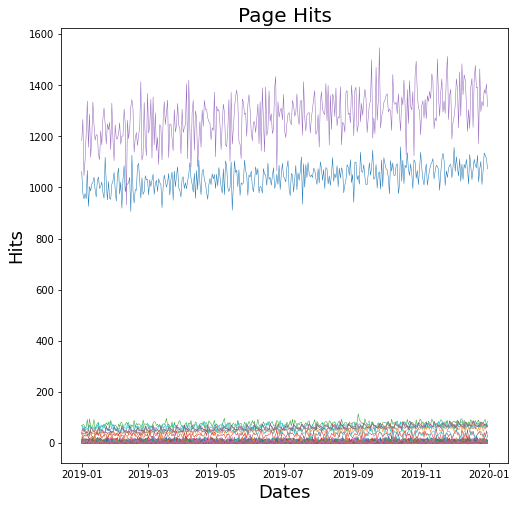

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(data, linewidth=0.5)
plt.xlabel('Dates', fontsize=18)
plt.ylabel('Hits', fontsize=18)
plt.title('Page Hits', fontsize=20)
# plt.legend(data.columns, loc=2)
plt.show()

#Line plot showing all the pages with the legend commented out

# **Line plot for medium volume pages** 

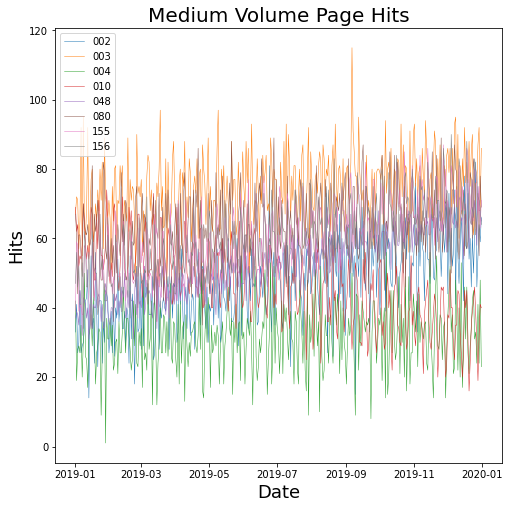

In [ ]:
#Line plot of the medium volume pages with a legend used to identify each page
selected = ['002','003','004' ,'010','048', '080','155','156']
plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Hits', fontsize=18)
plt.title('Medium Volume Page Hits', fontsize=20)
plt.legend(selected, loc=2)
plt.show()

#From the plot, the medium volume pages are quite noisy.

# **14-day rolling average for medium volume pages** 

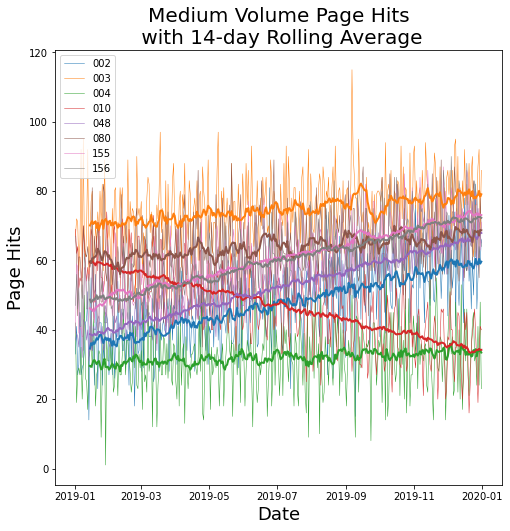

In [ ]:

period = 14
rolling_average = data.rolling(window=period).mean()

plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
plt.plot(rolling_average[selected], linewidth=2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Page Hits', fontsize=18)
plt.title('Medium Volume Page Hits\n with 14-day Rolling Average', fontsize=20)
plt.legend(selected, loc=2)
plt.show()

#The rolling averages makes the plot easier to read and understand the data better.

# **14-day rolling average with a trendline for medium volume pages** 

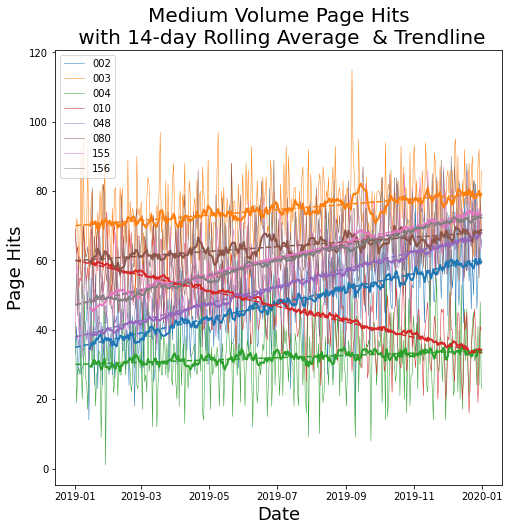

In [ ]:
period = 14
rolling_average = data.rolling(window=period).mean()

plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
plt.plot(rolling_average[selected], linewidth=2)
plt.gca().set_prop_cycle(None)
for name in selected:
    x = np.arange(len(data[name]))
    z = np.polyfit(x, data[name], 1)
    trend = np.poly1d(z)
    plt.plot(data.index, trend(x), linestyle='--')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Page Hits', fontsize=18)
plt.title('Medium Volume Page Hits\n with 14-day Rolling Average  & Trendline', fontsize=20)
plt.legend(selected, loc=2)
plt.show()

#the line plot shows the main plot, rolling averages and trendlines



# **14-day rolling average with a trendline for medium volume pages with Aesthetics** 

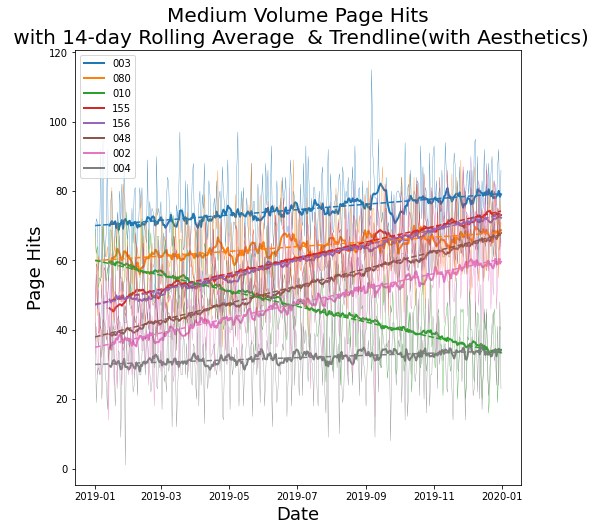

In [ ]:
period = 14
rolling_average = data.rolling(window=period).mean()
selected = ['003','080','010','155', '156','048','002','004'] #Manually reorder the selected pages to match the visual order in the chart
data[selected]

plt.figure(figsize=(8, 8))
plt.plot(rolling_average[selected], linewidth=2)
plt.gca().set_prop_cycle(None)
plt.plot(data[selected], linewidth=0.3)
plt.gca().set_prop_cycle(None)
for name in selected:
    x = np.arange(len(data[name]))
    z = np.polyfit(x, data[name], 1)
    trend = np.poly1d(z)
    plt.plot(data.index, trend(x), linestyle='--')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Page Hits', fontsize=18)
plt.title('Medium Volume Page Hits\n with 14-day Rolling Average  & Trendline(with Aesthetics)', fontsize=20)
plt.legend(selected, loc=2)
plt.show()
